In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
treeList = pd.read_csv("Street_Tree_List.csv")

In [9]:
treeList.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,...,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old)
0,48142,Permitted Site,Tree(s) ::,NaN,252.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,07/17/2002 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19725,DPW Maintained,Pinus Spp :: Pine Spp,100 STAIRWAY14,3.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,121399,DPW Maintained,Corymbia ficifolia :: Red Flowering Gum,349X Cargo Way,1.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46536,Permitted Site,Tree(s) ::,73 Summer St,2.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,04/01/2002 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,251210,DPW Maintained,Eucalyptus polyanthemos :: Silver Dollar Eucal...,1170 Ingalls St,2.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,11/02/1992 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
treeList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195765 entries, 0 to 195764
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   TreeID                     195765 non-null  int64  
 1   qLegalStatus               195708 non-null  object 
 2   qSpecies                   195765 non-null  object 
 3   qAddress                   194275 non-null  object 
 4   SiteOrder                  194013 non-null  float64
 5   qSiteInfo                  195765 non-null  object 
 6   PlantType                  195765 non-null  object 
 7   qCaretaker                 195765 non-null  object 
 8   qCareAssistant             24653 non-null   object 
 9   PlantDate                  68358 non-null   object 
 10  DBH                        152708 non-null  float64
 11  PlotSize                   145436 non-null  object 
 12  PermitNotes                53107 non-null   object 
 13  XCoord                     19

In [11]:
treeList.shape

(195765, 23)

In [15]:
treeList.describe()

,TreeID,SiteOrder,DBH,XCoord,YCoord,Latitude,Longitude,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old)
count,195765.000000,194013.000000,152708.000000,1.928250e+05,1.928250e+05,192825.000000,192825.000000,192574.000000,192627.000000,192688.000000,192682.000000,192684.000000
mean,127969.217148,4.571024,9.860918,5.999779e+06,2.107483e+06,37.766069,-122.445447,7.686006,5.604941,6.084442,17330.435931,20.281497
std,79956.261103,13.027059,29.218718,1.014071e+05,1.016335e+05,0.248040,0.412422,4.734886,2.413500,3.093450,14197.616530,12.846873
min,1.000000,-50.000000,0.000000,2.109337e+06,2.013289e+06,37.509004,-138.283861,1.000000,1.000000,1.000000,54.000000,1.000000
25%,53295.000000,1.000000,3.000000,5.996733e+06,2.097778e+06,37.740211,-122.454326,2.000000,4.000000,4.000000,59.000000,9.000000
50%,122144.000000,2.000000,7.000000,6.003392e+06,2.105042e+06,37.760169,-122.431428,9.000000,6.000000,6.000000,28856.000000,20.000000
75%,204270.000000,4.000000,12.000000,6.008740e+06,2.112138e+06,37.779595,-122.412924,11.000000,8.000000,8.000000,28861.000000,31.000000
max,266895.000000,1700.000000,9999.000000,6.022031e+06,6.005733e+06,47.270219,-122.366622,15.000000,10.000000,11.000000,29492.000000,41.000000


## Step 1: Explore

#### How many unique zipcodes are represented?
Returning the length of the list of unique zip codes

In [19]:
uniqueZipCode = len(pd.unique(treeList['Zip Codes']))
uniqueZipCode

30

#### How many total trees are there?
Returning the count of TreeID column

In [22]:
treeList['TreeID'].count()

195765

#### What are the various formats for dimensions?
Size of dataframe is number of fields in the dataframe<br>
Shape of the dataframe is number of rows and number of columns

In [37]:
treeList.size
treeList.shape

(195765, 23)

#### What are the different Site information options?
Returning the list of unique values in the Site Info column

In [28]:
treeList['qSiteInfo'].unique()

array(['Sidewalk: Curb side : Cutout', 'Side Yard : Yard',
       'Back Yard : Yard', 'Sidewalk: Property side : Yard',
       'Median : Yard', 'Unaccepted Street : Yard', 'Front Yard : Yard',
       'Sidewalk: Curb side : Yard', 'Sidewalk: Property side : Cutout',
       'Unaccepted Street : Cutout', 'Median : Cutout',
       'Side Yard : Cutout', 'unknown : Yard', 'Back Yard : Cutout',
       'Sidewalk: Curb side : Pot', 'Sidewalk: Curb side :', 'Median :',
       ':', 'Front Yard : Pot', 'Front Yard : Cutout',
       'Unaccepted Street : Pot', ': Yard', ': Cutout', 'Front Yard :',
       'Sidewalk: Property side : Pot', 'Sidewalk: Property side :',
       'unknown : Cutout', 'Hanging basket : Cutout',
       'Sidewalk: Curb side : Hanging Pot', 'Hanging basket : Yard',
       'unknown : Pot', 'Median : Hanging Pot'], dtype=object)

#### Which is more popular for the caretaker- Private or Department of Public Works?
Returning the counts of each value sorted from largest to smallest

In [45]:
treeList['qCaretaker'].value_counts().nlargest()

Private     164075
DPW          27950
SFUSD         1100
Port           726
Rec/Park       722
Name: qCaretaker, dtype: int64

#### What missing data is there in this dataset? 
**Which columns are impacted?** <br>
**How many rows in each column?** <br>
Returning the sum of rows in each column with a null value

In [33]:
treeList.isna().sum()

TreeID                            0
qLegalStatus                     57
qSpecies                          0
qAddress                       1490
SiteOrder                      1752
qSiteInfo                         0
PlantType                         0
qCaretaker                        0
qCareAssistant               171112
PlantDate                    127407
DBH                           43057
PlotSize                      50329
PermitNotes                  142658
XCoord                         2940
YCoord                         2940
Latitude                       2940
Longitude                      2940
Location                       2940
Fire Prevention Districts      3191
Police Districts               3138
Supervisor Districts           3077
Zip Codes                      3083
Neighborhoods (old)            3081
dtype: int64

***

## Step 2: Visualize

#### Create a histogram of the number of trees in each zipcode

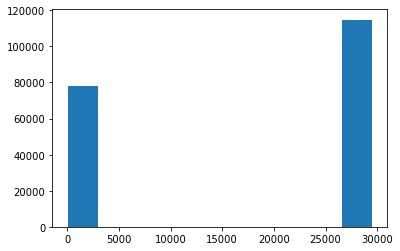

In [42]:
plt.hist(treeList['Zip Codes'])
plt.show()

#### Create a histogram of the number of trees cared for by "Private" vs. "DPW".

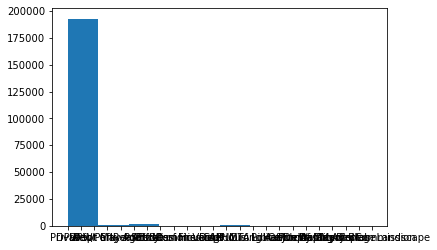

In [47]:
plt.hist(treeList['qCaretaker'])
plt.show()